<a href="https://colab.research.google.com/github/Soni-Test/Unsupervised-ML-Customer-Segmentation/blob/main/Sonica_Online_Retail_Customer_Segmentation_CP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **Importing Dataset**

In [ ]:
# Mounting google drive 
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
retail_df = pd.read_excel("https://raw.githubusercontent.com/Soni-Test/Unsupervised-ML-Customer-Segmentation/main/Online%20Retail.xlsx")

In [ ]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
retail_df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [ ]:
# Looking the shape of dataset
retail_df.shape

(541909, 8)

In [ ]:
# Looking the information
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Looking for unique values in columns of dataset
for i in retail_df.columns:
  print("Total Unique Values in", i, "-", len(retail_df[i].unique()))

Total Unique Values in InvoiceNo - 25900
Total Unique Values in StockCode - 4070
Total Unique Values in Description - 4224
Total Unique Values in Quantity - 722
Total Unique Values in InvoiceDate - 23260
Total Unique Values in UnitPrice - 1630
Total Unique Values in CustomerID - 4373
Total Unique Values in Country - 38


In [ ]:
# Looking for numerical description
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data Cleaning** 

### **Looking at Null Values**

In [ ]:
# Checking null value
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Checking  missing values in 'CustomerID' column
miss_value = retail_df['CustomerID'].isnull().sum()/(retail_df.shape[0]) * 100
print("We have {:.2f} % of missing values in 'CustomerID' Column".format(miss_value))

We have 24.93 % of missing values in 'CustomerID' Column


In [ ]:
# Checking  missing values in 'Description' column
miss_value1 = retail_df['Description'].isnull().sum()/(retail_df.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Description' Column".format(miss_value1))

We have 0.27 % of missing values in 'Description' Column


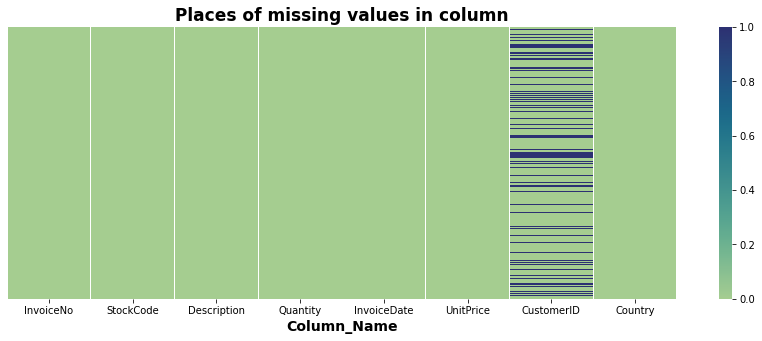

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(retail_df.isnull(), cbar=True, yticklabels=False, cmap="crest")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()


After looking into the null values, we can clearly see that the **ColumnID** of our dataset has the highest number of **~ 25%** NAN values which could impact our result. But with the missing value in **Description** column are quite less, infact **< 1%** of total value which could not impact on our result.

So, its better to drop all there missing values from our data dataset. 

In [ ]:
retail_df.dropna(inplace=True)

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
retail_df.shape

(406829, 8)

**Hence, after removing the null values from columns 'Description' and 'CustomerID' our dataset value has been reduced to 406829 from 541909.**

**Dataset has been cleaned and been even reduced to 397924 after the removal of cancellation letter 'C' from 'InvoiceNo' column.** 

### **Dropping Duplicates**

In [ ]:
retail_df.drop_duplicates(inplace=True)

In [ ]:
retail_df.shape

(401604, 8)

In [ ]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000

**Henceforth, the final cleaned dataset is ready for the analysis. And all the duplicates values has been dropped. Final value of the dataset has been reduced to (401604,8).**

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Copying the cleaned dataframe into a new dataframe
cl_retail_df = retail_df.copy()

# **Top Customers**

In [ ]:
top_customers = pd.DataFrame(cl_retail_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head()

CustomerID  count
0     17841.0   7812
1     14911.0   5898
2     14096.0   5128
3     12748.0   4459
4     14606.0   2759

Text(0.5, 1.0, "Top 5 Cusotmer's ID.")

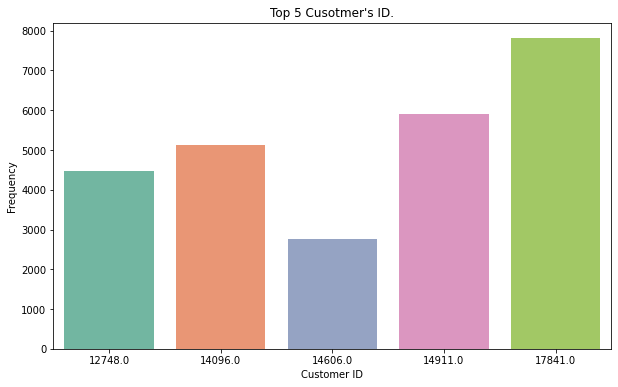

In [ ]:
# Plotting top five customers 
plt.figure(figsize = (10,6))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")

## **Checking the distribution of customers over a period of one year** 

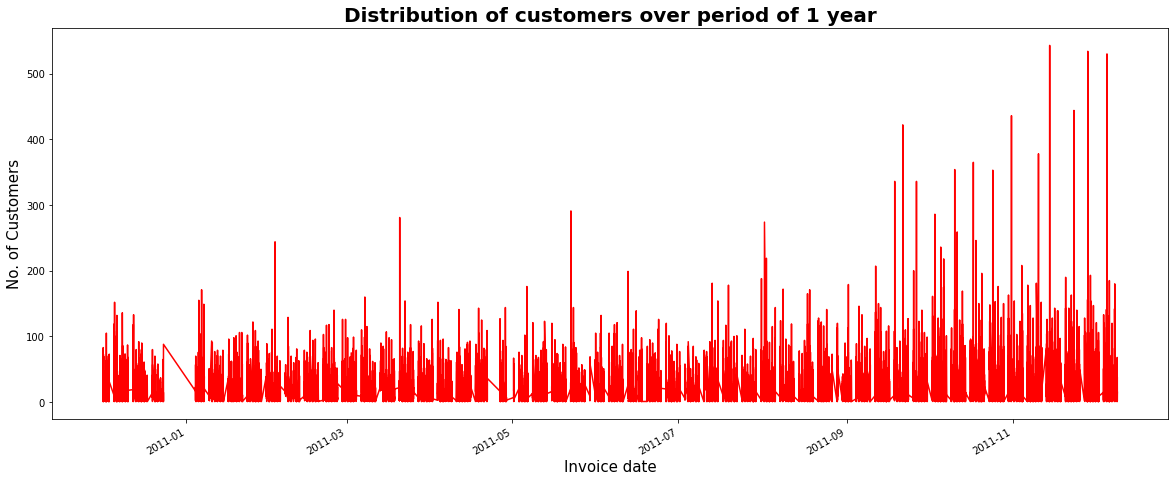

In [ ]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,8))
customer_distribution = cl_retail_df.groupby('InvoiceDate').count()['CustomerID'].plot(color='red')

## Set title and x, y labels
plt.title('Distribution of customers over period of 1 year', size=20, fontweight='bold')
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

# **Top Countries**

In [ ]:
cl_retail_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
cl_retail_df['Country'].value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

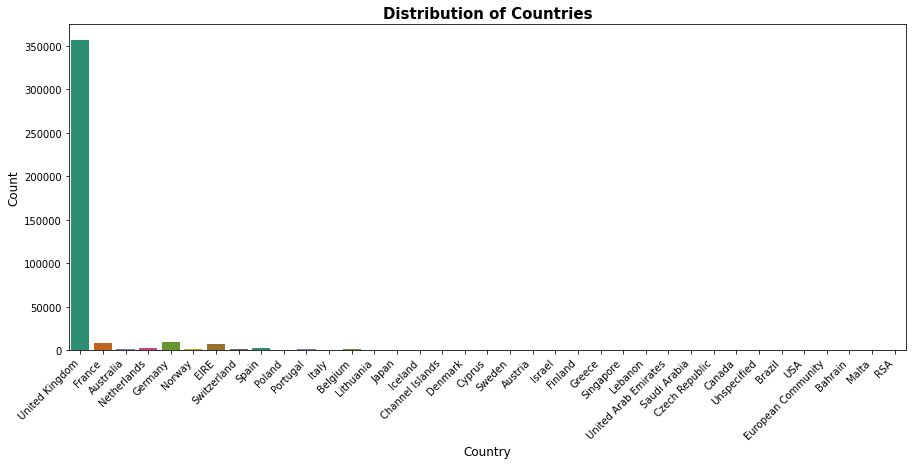

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Country', data=cl_retail_df, palette ='Dark2')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Countries",fontsize = 15, fontweight="bold")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Country",fontsize = 12)
plt.show()

In [ ]:
top_countries = pd.DataFrame(cl_retail_df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/cl_retail_df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head()

Country  Total Counts  Country %
0  United Kingdom        356728  88.825809
1         Germany          9480   2.360534
2          France          8475   2.110288
3            EIRE          7475   1.861286
4           Spain          2528   0.629476

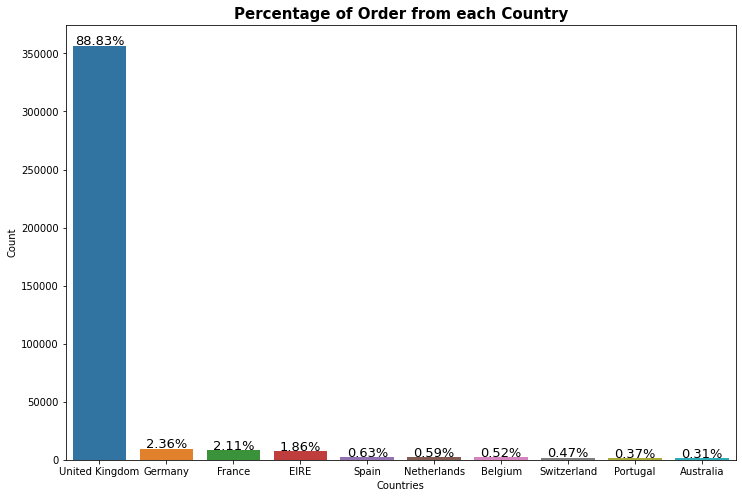

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
splot = sns.barplot(x='Country',y='Total Counts',data = top_countries[:10])
plt.title('Percentage of Order from each Country', size = 15, fontweight ='bold')
plt.xlabel('Countries', size = 10)
plt.ylabel('Count', size = 10)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/cl_retail_df.shape[0]*100),ha = "center", size = 13)

**Among these ten coountries:**

* 88.92% customers are from United Kingdom.
* 2.30%, 2.12%, 1.84% and 0.63% customers are from Germany, France, Eire and Spain respectively.
* Remain customers belong to other coutries like Netherlands, Belgium, Switzerland, Portugal, and Australia.

## **Orders per Country**

In [ ]:
temp = cl_retail_df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries from where orders made: {}'.format(len(countries)))

Number of countries from where orders made: 37


In [ ]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order Number'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='<b>Number of Orders per Country</b>', width = 900, height = 600,
geo = dict(showframe = True))
#______________
choromap = go.Figure(data = [data], layout = layout)
choromap.update_layout(title_x=0.5, font=dict(size=15))
choromap.update_traces(colorbar_thickness= 20,selector=dict(type='choropleth'))
iplot(choromap, validate=False)

# **Top Description**

In [ ]:
Top_description=cl_retail_df['Description'].value_counts().reset_index()
Top_description.rename(columns={'index': 'Product_Name'}, inplace=True)
Top_description.rename(columns={'Description': 'Count'}, inplace=True)
Top_description.head()

Product_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2058
1            REGENCY CAKESTAND 3 TIER   1894
2             JUMBO BAG RED RETROSPOT   1659
3                       PARTY BUNTING   1409
4       ASSORTED COLOUR BIRD ORNAMENT   1405

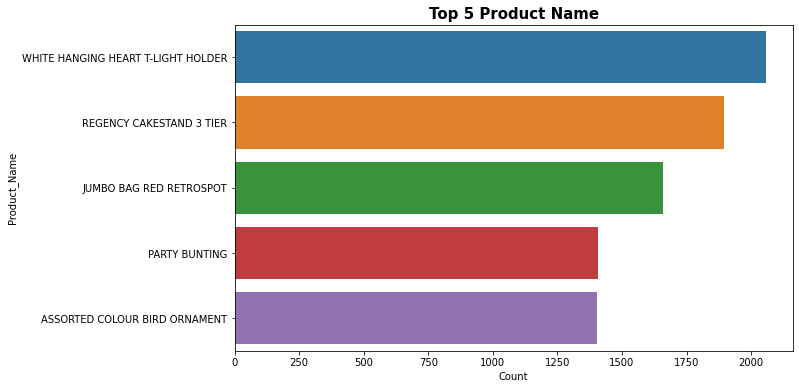

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top 5 Product Name', fontweight='bold', size=15)
sns.barplot(y='Product_Name',x='Count',data=Top_description[:5])
plt.show()

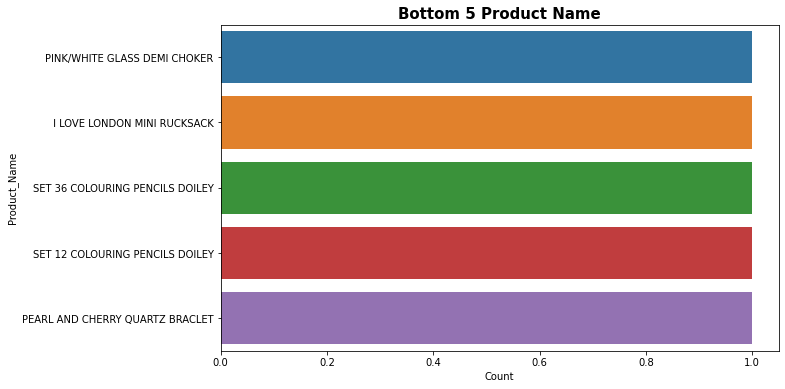

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bottom 5 Product Name', fontweight='bold', size=15)
sns.barplot(y='Product_Name',x='Count',data=Top_description[-5:])
#plt.xticks(rotation=45, ha='right')
plt.show()

# **Top StockCode**

In [ ]:
Top_stock =cl_retail_df['StockCode'].value_counts().reset_index()
Top_stock.rename(columns={'index': 'StockCode_Value'}, inplace=True)
Top_stock.rename(columns={'StockCode': 'Count'}, inplace=True)
Top_stock.head()

StockCode_Value  Count
0          85123A   2065
1           22423   1894
2          85099B   1659
3           47566   1409
4           84879   1405

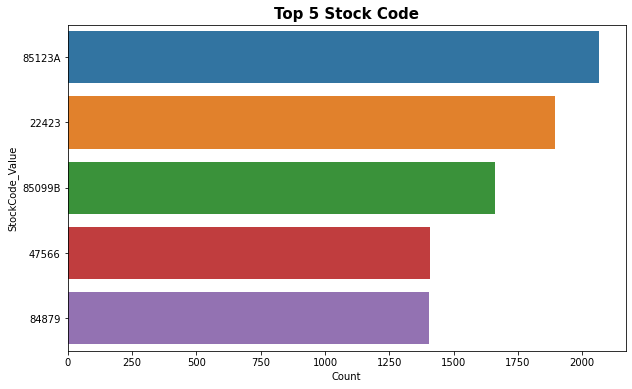

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top 5 Stock Code', fontweight='bold', size=15)
sns.barplot(y='StockCode_Value',x='Count',data=Top_stock[:5])
plt.show()

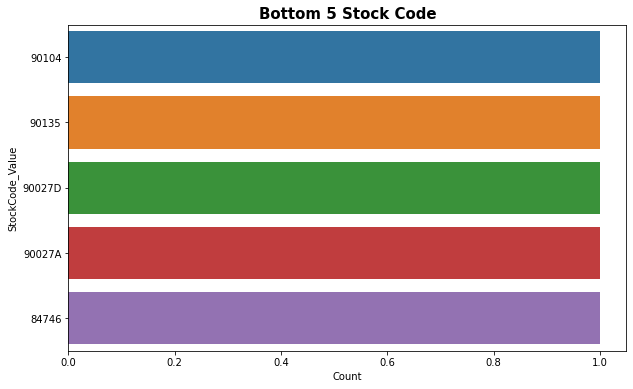

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bottom 5 Stock Code', fontweight='bold', size=15)
sns.barplot(y='StockCode_Value',x='Count',data=Top_stock[-5:])
plt.show()

# **Feature Engineering** 

**Convert 'InvoiceDate' column into date time formate**

In [ ]:
cl_retail_df["InvoiceDate"] = pd.to_datetime(cl_retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

**Creating new feature Day from InvoiceDate**

In [ ]:
cl_retail_df['Day']=cl_retail_df['InvoiceDate'].dt.day_name()

**Create some new features from Invoicedate like Hours,Year,Month_Num,Day_Num**

In [ ]:
cl_retail_df["Year"] = cl_retail_df["InvoiceDate"].apply(lambda x: x.year)
cl_retail_df["Month_Num"] = cl_retail_df["InvoiceDate"].apply(lambda x: x.month)
cl_retail_df["Day_Num"] = cl_retail_df["InvoiceDate"].apply(lambda x: x.day)
cl_retail_df["Hour"] = cl_retail_df["InvoiceDate"].apply(lambda x: x.hour)
cl_retail_df["Minute"] = cl_retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
cl_retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   Month_Num  Day_Num  Hour  Minute  
0         12        1     8      26  
1         12        1     8      26  
2         12        1     8      26  
3         12        1     8      26  
4         12        1     8      26

**Creating feature Total Amount** 

In [ ]:
cl_retail_df['TotalAmount']=cl_retail_df['Quantity']*cl_retail_df['UnitPrice']

In [ ]:
cl_retail_df['Month']=cl_retail_df['InvoiceDate'].dt.month_name()

In [ ]:
cl_retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  Year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   Month_Num  Day_Num  Hour  Minute  TotalAmount     Month  
0         12        1     8      26        15.30  December  
1         12        1     8      26        20.34  December  
2         12        1     8      26        22.00  December  
3         12        1     8      26        20.34  December  
4         12        1     8      26        20.34  December

# **Business Context**

In [ ]:
bus_retail_df = cl_retail_df.copy()

In [ ]:
def business_insight(data):
  if(data < 0):
    return 'Bad for Business'
  else:
    return 'Good for Business'
  return data

In [ ]:
# applying business insight function on Total_Amount
bus_retail_df['Business_insight'] = bus_retail_df['TotalAmount'].apply(business_insight)

In [ ]:
# aggregating business_insight in a column
business_insight_df = pd.DataFrame(bus_retail_df.groupby('Business_insight',sort = False).agg({'CustomerID': 'count'}))
business_insight_df.head(5)

CustomerID
Business_insight             
Good for Business      392732
Bad for Business         8872

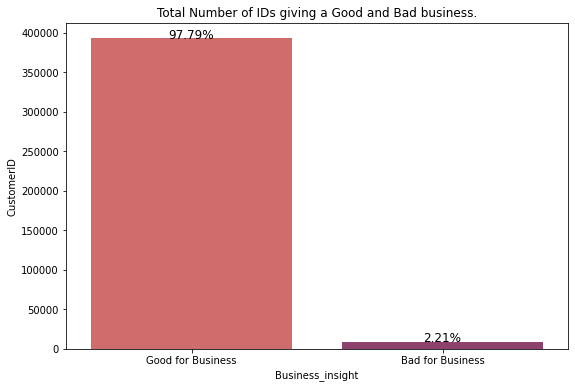

In [ ]:
# Having some insights about cancelled orders to tag them bad for business growth
fig, ax = plt.subplots(figsize = (9,6))
sns.barplot(x= business_insight_df.index, y=business_insight_df['CustomerID'], palette = 'flare')
plt.title('Total Number of IDs giving a Good and Bad business.')

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+30, '{:1.2f}''%'.format(height/cl_retail_df.shape[0]*100),ha = "center", size = 12)

**There are 2.19% customers who cancelled their orders So, In order to grow our business we need keep an eye on these type customers and their ordering and purchasing behaviour, Why do they cancel orders? The reason is unknown.**

**But there is an positive insight too, which shows there are total of 97.79% customers who are good for our business purpose.**

### **Dropping Cancelled Items**

**Now it is need to drop some  InvoiceNo  which are starts with 'C' because 'C', it indicates a cancellation**

In [ ]:
cl_retail_df['InvoiceNo'] = cl_retail_df['InvoiceNo'].astype('str')

In [ ]:
cl_retail_df= cl_retail_df[~ cl_retail_df['InvoiceNo'].str.contains('C')]

In [ ]:
cl_retail_df.describe()

Quantity      UnitPrice     CustomerID           Year  \
count  392732.000000  392732.000000  392732.000000  392732.000000   
mean       13.153718       3.125596   15287.734822    2010.934630   
std       181.588420      22.240725    1713.567773       0.247178   
min         1.000000       0.000000   12346.000000    2010.000000   
25%         2.000000       1.250000   13955.000000    2011.000000   
50%         6.000000       1.950000   15150.000000    2011.000000   
75%        12.000000       3.750000   16791.000000    2011.000000   
max     80995.000000    8142.750000   18287.000000    2011.000000   

           Month_Num        Day_Num           Hour         Minute  \
count  392732.000000  392732.000000  392732.000000  392732.000000   
mean        7.601935      15.044651      12.721579      30.406244   
std         3.415023       8.652557       2.276677      17.081162   
min         1.000000       1.000000       6.000000       0.000000   
25%         5.000000       7.000000      11.000000      16.000000   
50%         8.000000      15.000000      13.000000      31.000000   
75%        11.000000      22.000000      14.000000      45.000000   
max        12.000000      31.000000      20.000000      59.000000   

         TotalAmount  
count  392732.000000  
mean       22.629195  
std       311.083465  
min         0.000000  
25%         4.950000  
50%        12.390000  
75%        19.800000  
max    168469.600000

In [ ]:
cl_retail_df.shape

(392732, 16)

**Now all the negative values from the Quantity has been removed and also the values of our dataset has been reduced to 392732. As all the letter starting from "C" indicating cancellation has been removed.** 

In [ ]:
cl_retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'Year', 'Month_Num',
       'Day_Num', 'Hour', 'Minute', 'TotalAmount', 'Month'],
      dtype='object')

In [ ]:
num_features = list(cl_retail_df.select_dtypes(['int64','float64']))
num_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Year',
 'Month_Num',
 'Day_Num',
 'Hour',
 'Minute',
 'TotalAmount']

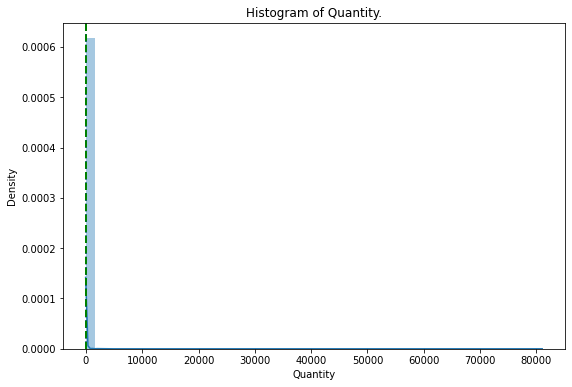

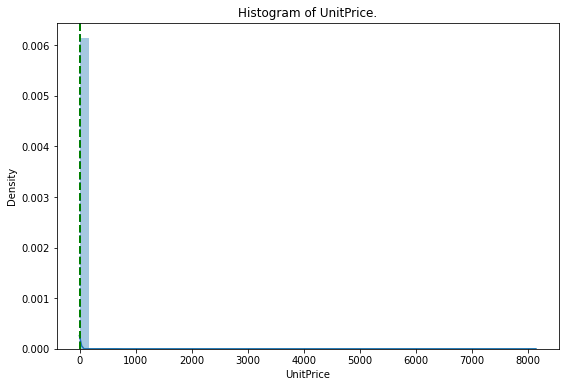

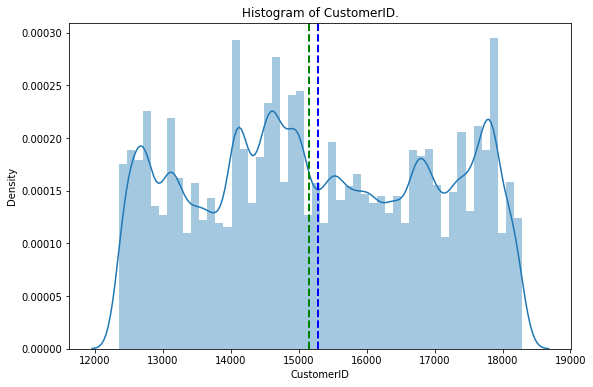

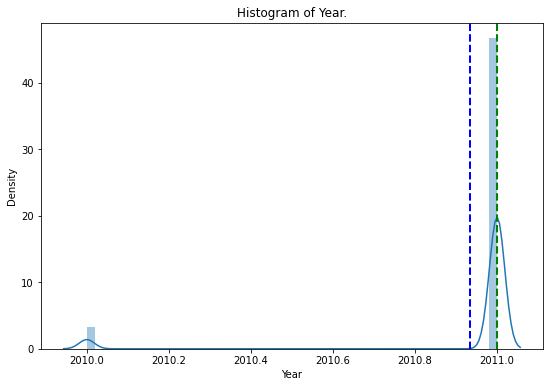

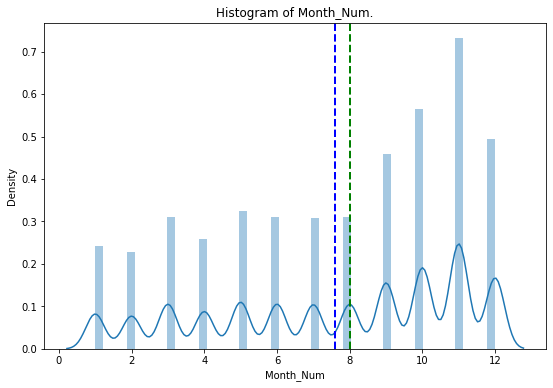

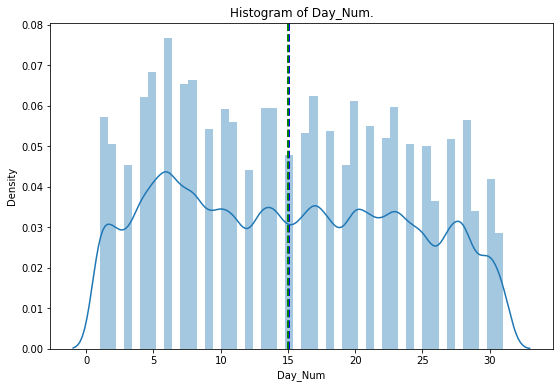

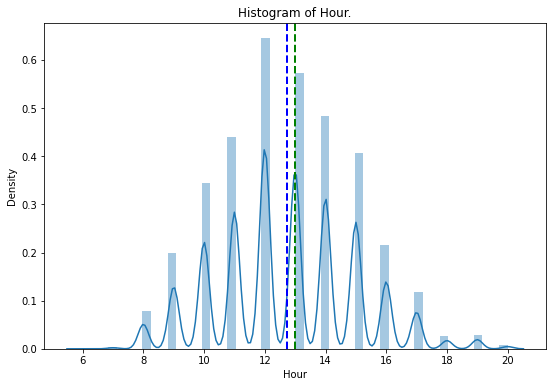

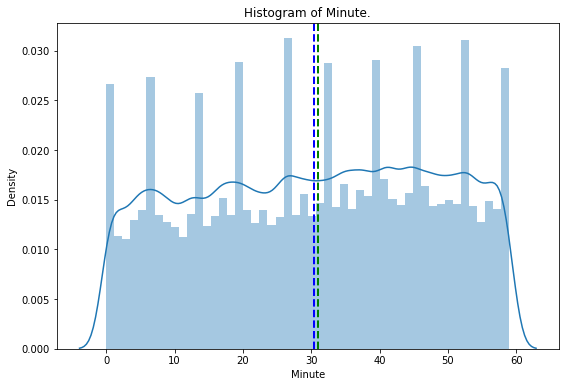

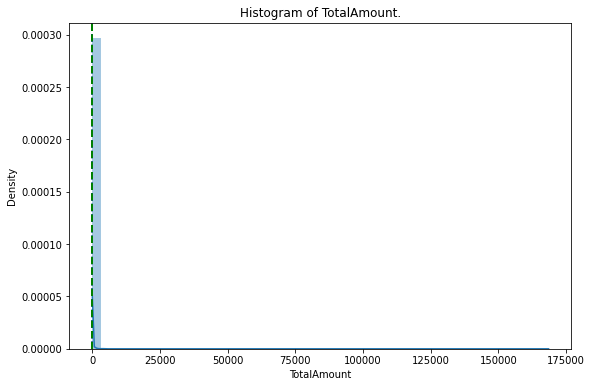

In [ ]:
for col in num_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (cl_retail_df[col])
  sns.distplot(cl_retail_df[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Histogram of {col}.')
  plt.show()

# **Exploring some important features**

* **Quantity**
* **Unit Price**
* **Total Amount**

## **Quantity**

In [ ]:
cl_retail_df['Quantity'].describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

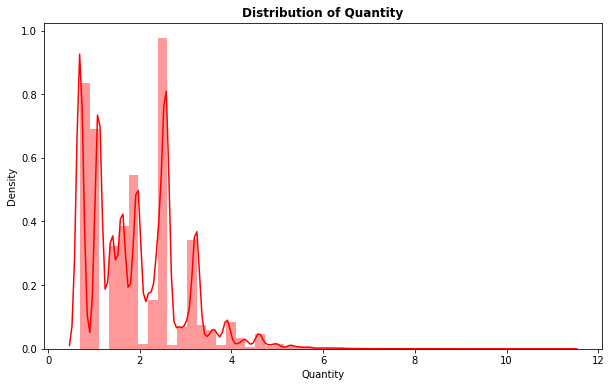

In [ ]:
# Distribution of Quantity
fig = plt.figure(figsize = (10,6))
sns.distplot(np.log1p(cl_retail_df['Quantity']),color="red")
plt.title('Distribution of Quantity', fontweight='bold')
plt.xlabel('Quantity')
plt.show()

## **Unit Price**

In [ ]:
cl_retail_df['UnitPrice'].describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

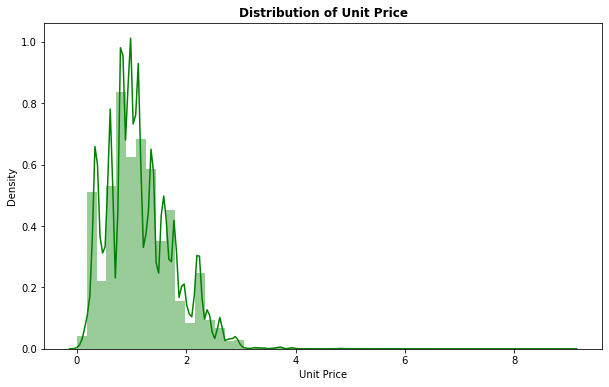

In [ ]:
# Distribution of Unit Price
plt.figure(figsize = (10,6))
sns.distplot(np.log1p(cl_retail_df['UnitPrice']),color="green")
plt.title('Distribution of Unit Price', fontweight='bold')
plt.xlabel('Unit Price')
plt.show()

## **Total Amount** 

In [ ]:
cl_retail_df['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

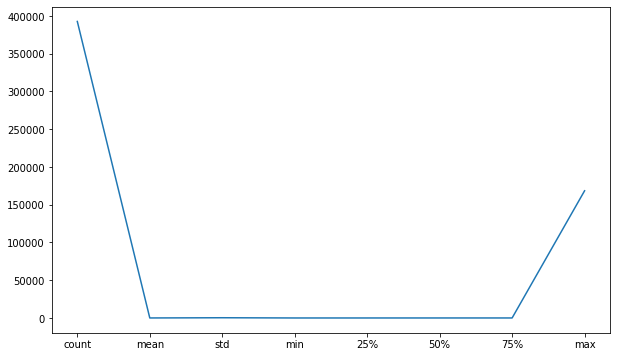

In [ ]:
plt.figure(figsize=(10,6))
cl_retail_df['TotalAmount'].describe().plot()
plt.show()

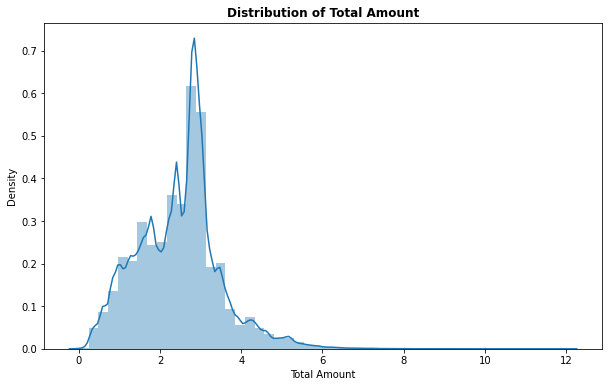

In [ ]:
# Distribution of total amounts
plt.figure(figsize = (10,6))
sns.distplot(np.log1p(cl_retail_df['TotalAmount']))
plt.title('Distribution of Total Amount', fontweight='bold')
plt.xlabel('Total Amount')
plt.show()

# **Total Purchasing in Years**

In [ ]:
# Creating dataframe for Invoice_Year
purchase_year = cl_retail_df['Year'].value_counts().sort_values(ascending = False).reset_index()
purchase_year.rename(columns = {'index':'Year','Year':'Frequency'},inplace = True)
purchase_year

Year  Frequency
0  2011     367059
1  2010      25673

Text(0.5, 1.0, 'Total Purchasing in Years')

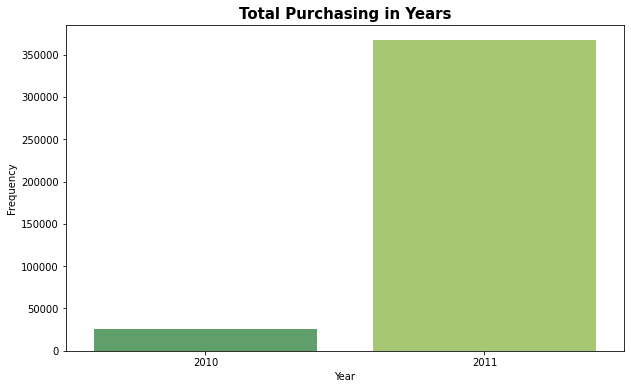

In [ ]:
# Plotting total invoices with year
plt.figure(figsize = (10,6))
sns.barplot(x = 'Year',y ='Frequency',palette= 'summer',data = purchase_year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Total Purchasing in Years", fontweight ='bold',size=15)

# **Top Months**

In [ ]:
# Creating dataframe for Invoice_Months counts
top_months = pd.DataFrame(cl_retail_df['Month'].value_counts().sort_values(ascending = False).reset_index())
top_months.rename(columns = {'index':'Month','Month':'Total Frequency'},inplace = True)
top_months.head()

Month  Total Frequency
0   November            63182
1    October            48796
2   December            42699
3  September            39671
4        May            28075

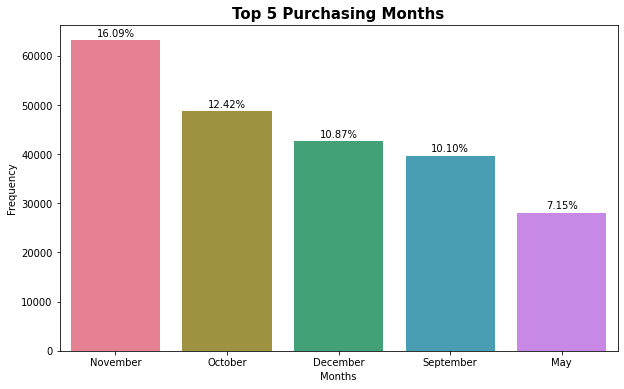

In [ ]:
# Plotting top customers' purchasing in different five Months 
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Month',y = 'Total Frequency',palette= 'husl',data = top_months[:5])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Top 5 Purchasing Months", fontweight='bold',size=15)

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/cl_retail_df.shape[0]*100),ha = "center", size = 10)

# **Top Days**

In [ ]:
# Creating dataframe for Invoice_Days counts
top_days = pd.DataFrame(cl_retail_df['Day'].value_counts().sort_values(ascending = False).reset_index())
top_days.rename(columns = {'index':'Day','Day':'Total Frequency'},inplace = True)
top_days.head()

Day  Total Frequency
0   Thursday            79260
1  Wednesday            68043
2    Tuesday            65747
3     Monday            64237
4     Sunday            61214

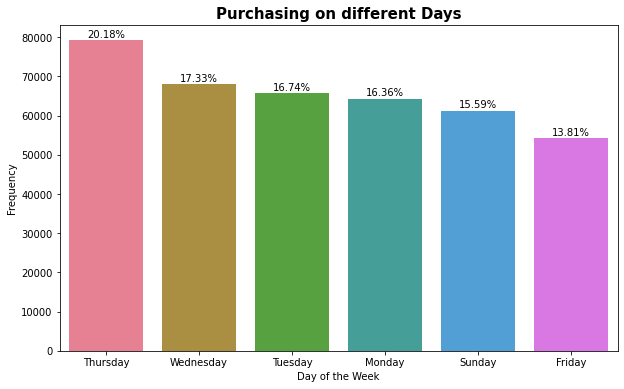

In [ ]:
# Purchasings of customers on different days
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Day',y = 'Total Frequency',palette= 'husl',data = top_days)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title("Purchasing on different Days",fontweight='bold',size=15)

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+800, '{:1.2f}''%'.format(height/cl_retail_df.shape[0]*100),ha = "center", size = 10)

# **Top Hours**

In [ ]:
# Creating dataframe for Invoice_Months counts
top_hours = pd.DataFrame(cl_retail_df['Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hours.rename(columns = {'index':'Hour','Hour':'Total Frequency'},inplace = True)
top_hours.head()

Hour  Total Frequency
0    12            70942
1    13            63024
2    14            53260
3    11            48373
4    15            44793

Text(0.5, 1.0, 'Purchasing Hours')

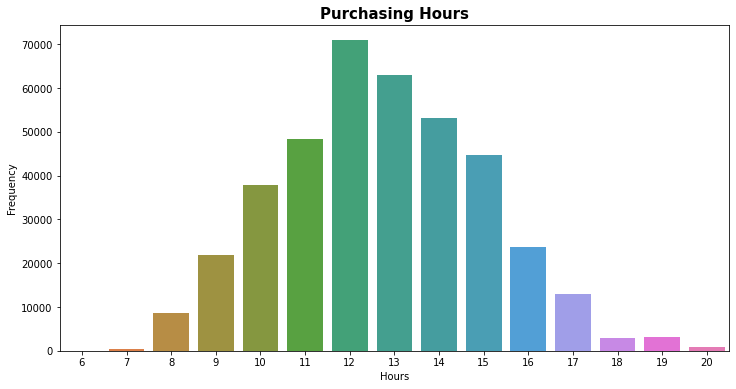

In [ ]:
# Plotting purchases at different hours
plt.figure(figsize = (12,6))
sns.barplot(x = 'Hour',y = 'Total Frequency',palette = 'husl',data = top_hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Purchasing Hours",fontweight='bold',size=15)

# **Top Time Duration of Day**

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
cl_retail_df['Time_type'] = cl_retail_df['Hour'].apply(time_type)

Text(0.5, 1.0, 'Top Time Duration of Day')

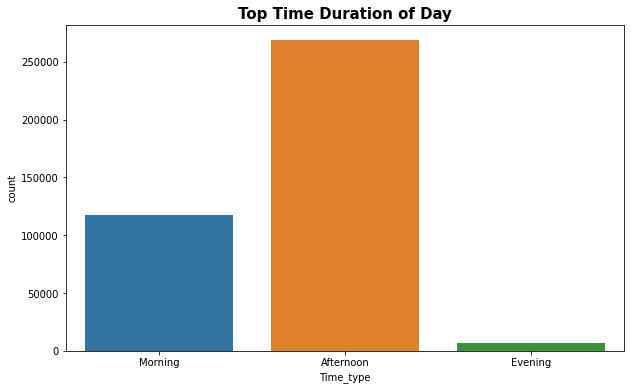

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Time_type',data= cl_retail_df)
plt.title('Top Time Duration of Day', fontweight='bold', size=15)

# **Correlation**

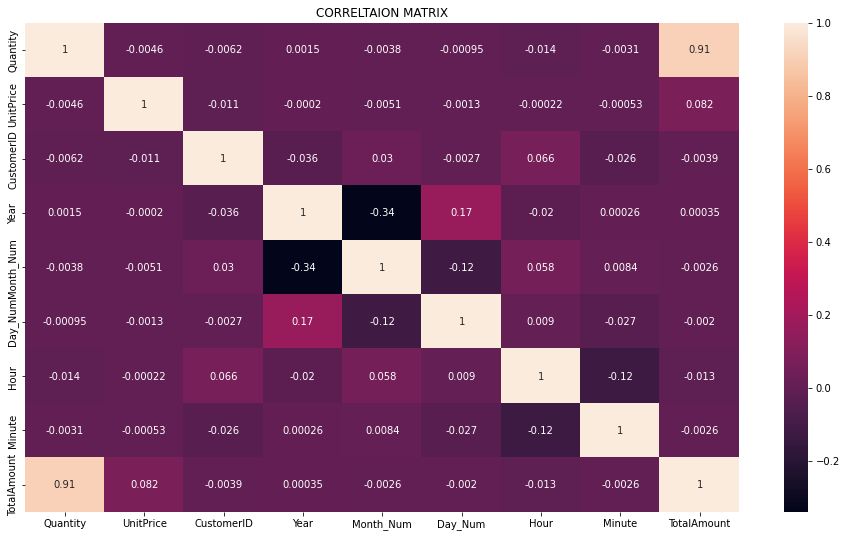

In [ ]:
# correlation between various columns
plt.figure(figsize = (16,9))
sns.heatmap(cl_retail_df.corr(), annot = True)
plt.title('CORRELTAION MATRIX')
plt.show()


# **RFM Model (Recency, Frequency, Monetary value)**

### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.**

* **Recency:** Customers who made purchases recently.
* **Frequency:** How often a customer makes a purchase.
* **Monetary Value:** How much money a customer spends on.

### **Performing RFM Segmentation and RFM Analysis, Step by Step:**

* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

In [ ]:
#Setting Latest date: 2011-12-10 as last invoice date was 2011-12-09. To calculate the number of days from recent purchase.
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = cl_retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                       'InvoiceNo': 'Frequency', 
                       'TotalAmount': 'Monetary'}, 
                        inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
#Descriptive statistics of Recency
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
#Descriptive statistics of Frequency
rfm_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

In [ ]:
#Descriptive statistics of Monetary
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

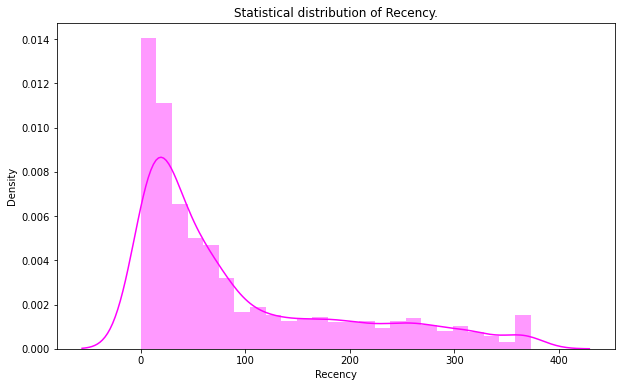

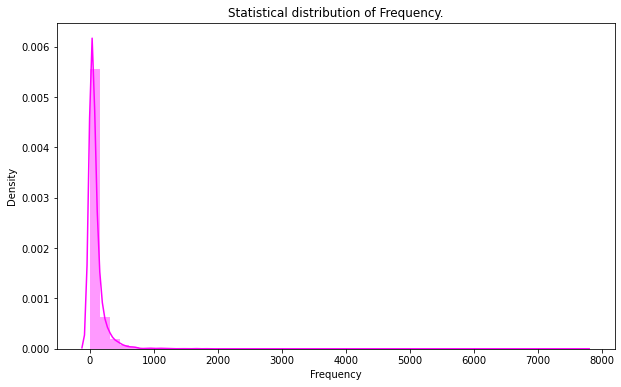

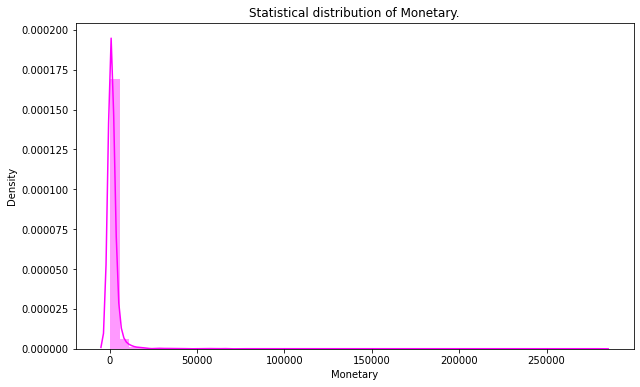

In [ ]:
for col in rfm_df:
  fig=plt.figure(figsize=(10,6))
  ax=fig.gca()
  feature = (rfm_df[col])
  sns.distplot(rfm_df[col], ax=ax, color='magenta')
  ax.set_title(f'Statistical distribution of {col}.')
  plt.show()

# **Quantile Split**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [ ]:
#Function to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculating and adding R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
#Calculating and adding RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup
CustomerID                                                
12346.0         325          1  77183.60  4  4  1      441
12347.0           2        182   4310.00  1  1  1      111
12348.0          75         31   1797.24  3  3  1      331
12349.0          18         73   1757.55  2  2  1      221
12350.0         310         17    334.40  4  4  3      443

In [ ]:
#Calculating and adding RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

**Interpretation**

**RFMScore:** It is the sum of R, F and M value that assigned by quantiles.

**RFMGroup:** This is the combination of R,F, and M values.

*For example:*

* A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

* Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [ ]:
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tf = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Text(0.5, 1.0, 'Normalized distribution of Recency')

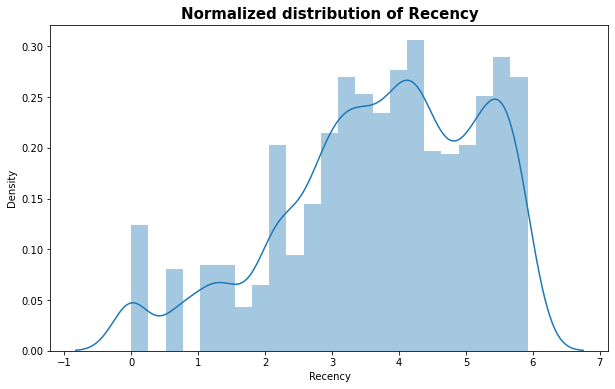

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tf['Recency']
plt.figure(figsize=(10,6))
sns.distplot(Recency_Plot)
plt.title("Normalized distribution of Recency", fontweight='bold',size=15)

Text(0.5, 1.0, 'Normalized distribution of Monetary')

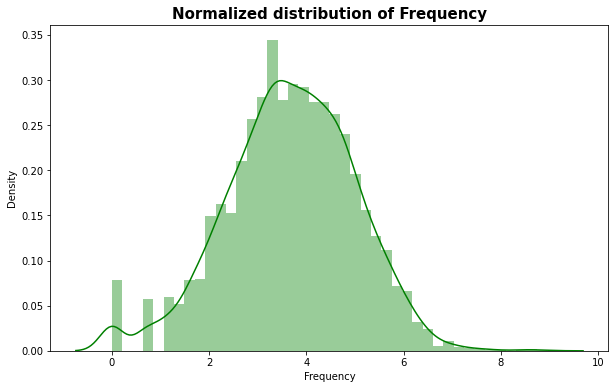

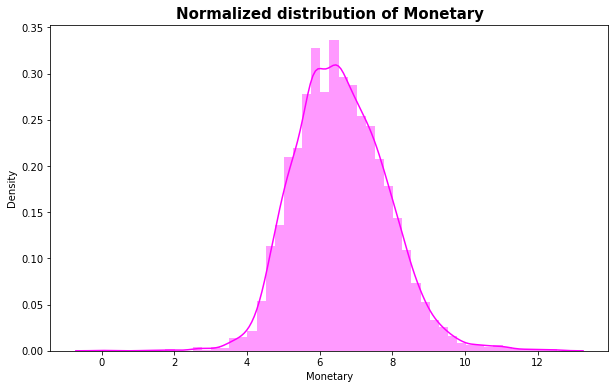

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tf.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(Frequency_Plot, color='green')
plt.title("Normalized distribution of Frequency", fontweight='bold',size=15)


#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tf.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(Monetary_Plot, color='magenta')
plt.title("Normalized distribution of Monetary", fontweight='bold',size=15)

## **Pre-Processing of RFM dataframe**

In [ ]:
# Importing library
from sklearn import preprocessing

In [ ]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# **Visualizing the relationship between R, F and M.**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

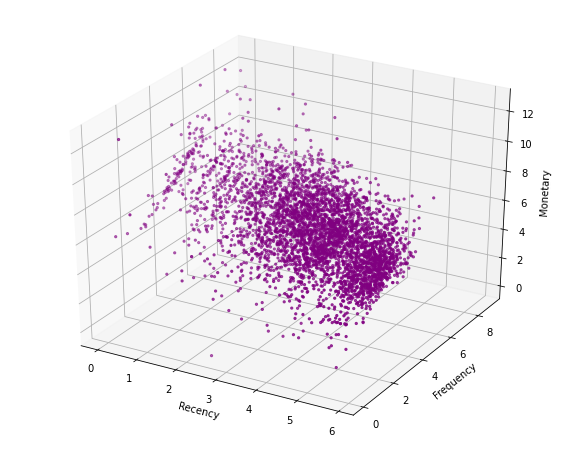

In [ ]:
#visualizing RFM
fig=plt.figure(figsize=(10,8))
plt.title('3d Visualization of Recency Frequency and Monetary', fontweight='bold',size=15)
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log

ax.scatter3D(xs,ys,zs,s=5, color ='purple')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

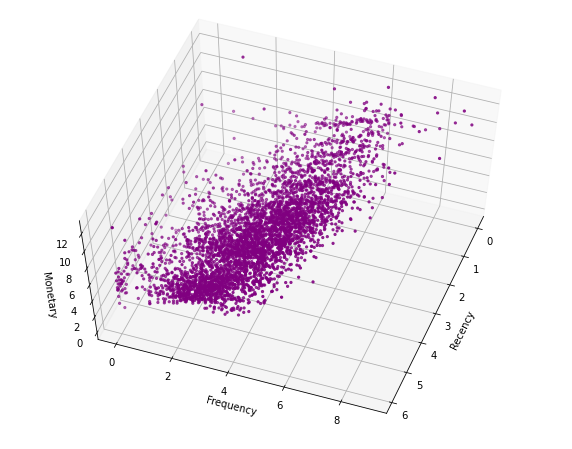

In [ ]:
ax.view_init(60,20)
fig

# **Model Development** 

In [ ]:
# Importing libraries
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn import metrics

# **A. Recency and Monetary**

## **Model 1: K-Means Clustering**

### **Applying Silhouette Score Method**

In [ ]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values

scaler_rec_mon=preprocessing.StandardScaler()

X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X= X_rec_mon

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42043960957985754
For n_clusters = 3, silhouette score is 0.342595854562582
For n_clusters = 4, silhouette score is 0.36476758026873857
For n_clusters = 5, silhouette score is 0.3363810103562334
For n_clusters = 6, silhouette score is 0.34419890617597065
For n_clusters = 7, silhouette score is 0.34735417704171834
For n_clusters = 8, silhouette score is 0.33913211259197545
For n_clusters = 9, silhouette score is 0.3454376816607021
For n_clusters = 10, silhouette score is 0.3471866598749944
For n_clusters = 11, silhouette score is 0.3376556848598993
For n_clusters = 12, silhouette score is 0.34333292732399323
For n_clusters = 13, silhouette score is 0.34222762942874924
For n_clusters = 14, silhouette score is 0.34060806905518165
For n_clusters = 15, silhouette score is 0.3385506042294294
For n_clusters = 16, silhouette score is 0.33896294850478104


### **Applying Elbow Method**

In [ ]:
fea_rec_mon=['Recency_log','Monetary_log']
X_fea_rec_mon=rfm_df[fea_rec_mon].values

scaler_rec_mon=preprocessing.StandardScaler()

X_rec_mon=scaler_rec_mon.fit_transform(X_fea_rec_mon)
X=X_rec_mon

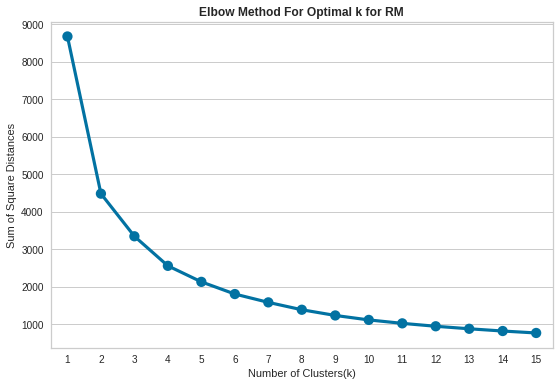

In [ ]:
sum_of_sq_dist = {}
for k in range(1,16):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (9,6))
plt.grid(True)
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k for RM',fontweight = 'bold')
plt.show()

In [ ]:
# plotting clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

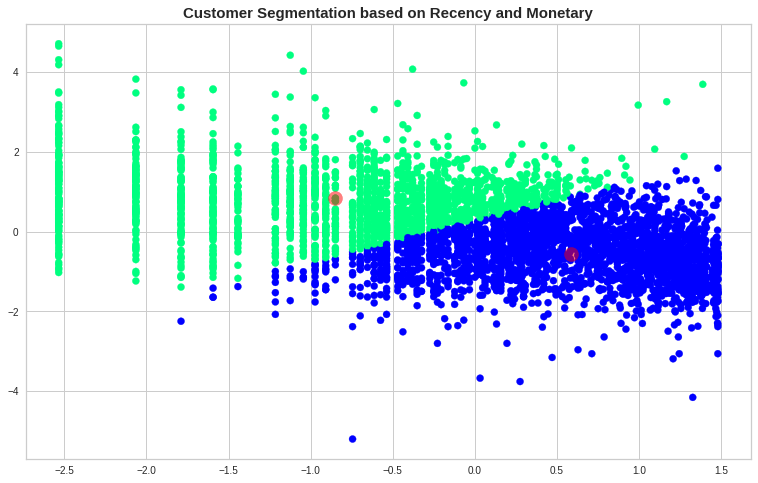

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Customer Segmentation based on Recency and Monetary', fontweight='bold', size=15)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **Model 2: DBSCAN**

Text(0.5, 1.0, 'DBSCAN on Regency and Frequency')

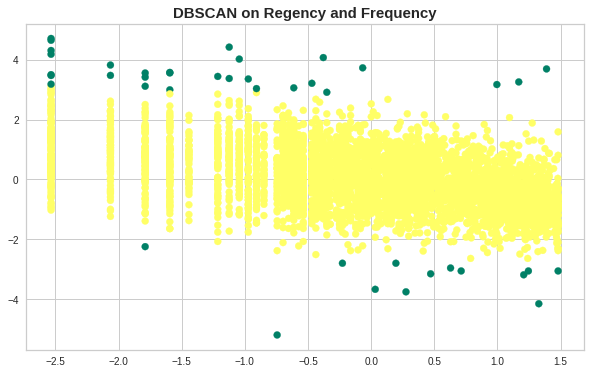

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=16).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='summer')
plt.title('DBSCAN on Regency and Frequency', fontweight='bold', size=15)

## **B. Frquency and Monetary**

### **Applying Silhouette Score Method**

In [ ]:
features_fre_mon = ['Frequency_log','Monetary_log']
X_features_fre_mon= rfm_df[features_fre_mon].values

scaler_fre_mon = preprocessing.StandardScaler()

X_fre_mon = scaler_fre_mon.fit_transform(X_features_fre_mon)
X= X_fre_mon

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784099179679686
For n_clusters = 3, silhouette score is 0.40772986590660476
For n_clusters = 4, silhouette score is 0.37121155322542704
For n_clusters = 5, silhouette score is 0.3466604145732018
For n_clusters = 6, silhouette score is 0.36181232248677336
For n_clusters = 7, silhouette score is 0.3449480356982516
For n_clusters = 8, silhouette score is 0.33178526784321427
For n_clusters = 9, silhouette score is 0.3436116170439496
For n_clusters = 10, silhouette score is 0.35800945528522277
For n_clusters = 11, silhouette score is 0.343134193733401
For n_clusters = 12, silhouette score is 0.3544767170926336
For n_clusters = 13, silhouette score is 0.36204679897148906
For n_clusters = 14, silhouette score is 0.3545780711864858
For n_clusters = 15, silhouette score is 0.34962945912346577
For n_clusters = 16, silhouette score is 0.3544702814338596


## **Applying Elbow Method**

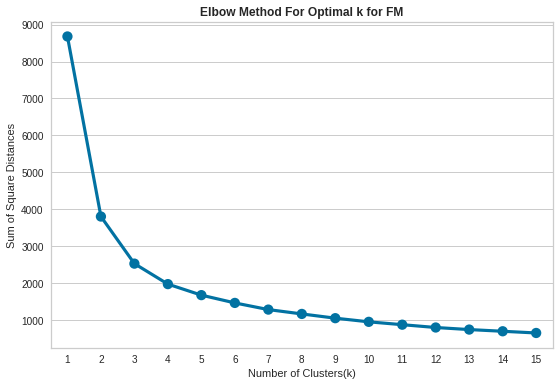

In [ ]:
sum_of_sq_dist = {}
for k in range(1,16):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (9,6))
plt.grid(True)
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k for FM', fontweight = 'bold')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

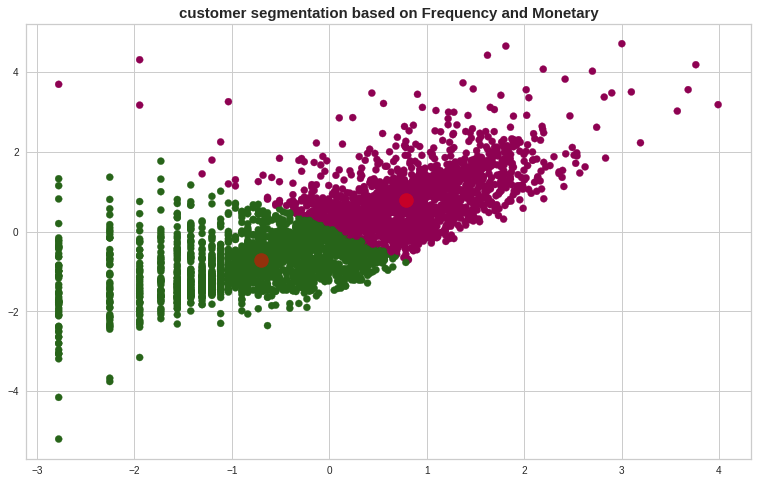

In [ ]:
plt.figure(figsize=(13,8))
plt.title('customer segmentation based on Frequency and Monetary',fontweight='bold', size=15)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **Model 2: DBSCAN**

Text(0.5, 1.0, 'DBSCAN on Frequency and Monetary')

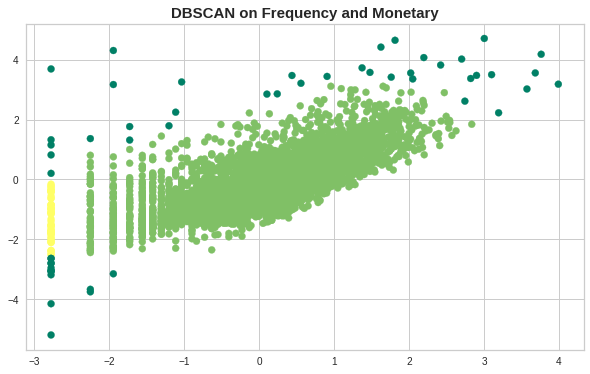

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=16).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='summer')
plt.title('DBSCAN on Frequency and Monetary', fontweight='bold', size=15)

## **Comparing the cluster spread between RF & FM**

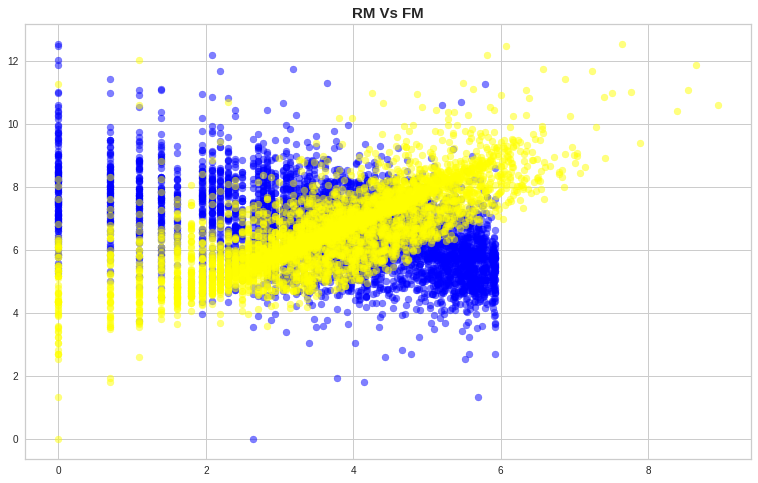

In [ ]:
plt.figure(figsize=(13,8))
plt.title('RM Vs FM', fontweight='bold',size=15)
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5, color='blue')
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5, color='yellow')

## **C. Recency ,Frequency and Monetary**

### **Applying Silhouette Method**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values

scaler=preprocessing.StandardScaler()

X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804
For n_clusters = 11 The average silhouette_score is : 0.26053571388536995
For n_clusters = 12 The average silhouette_score is : 0.2658660395456048
For n_clusters = 13 The average silhouette_score is : 0.2633746937000211
For n_clusters = 14 The average silhouette_score is : 0.25492771945211434
For n_clusters = 15 The average silhouette_score is : 

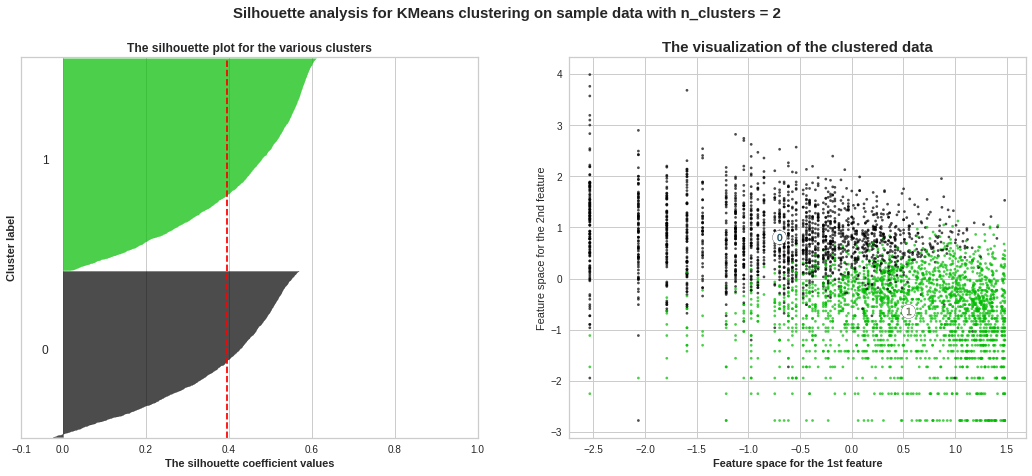

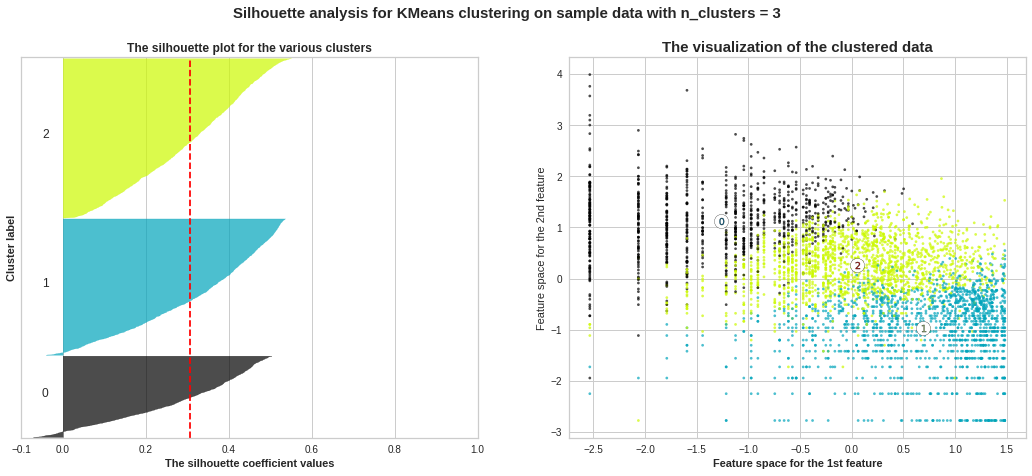

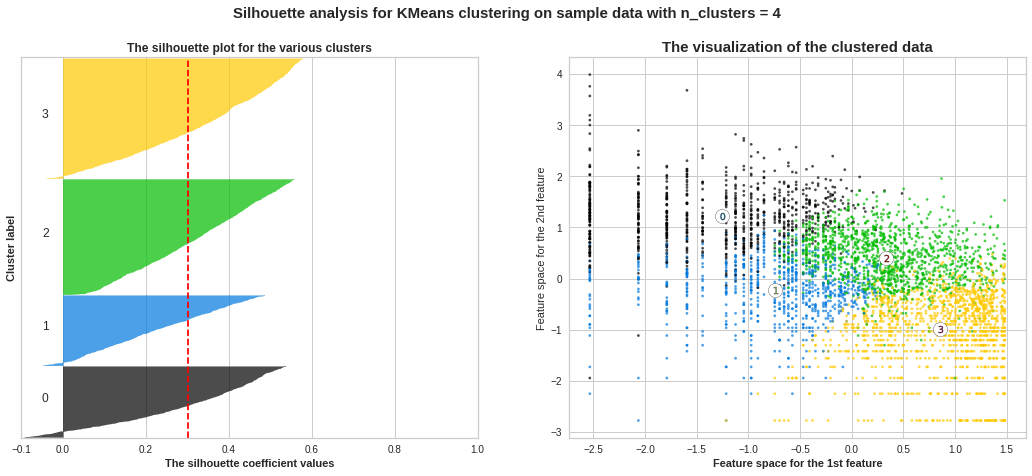

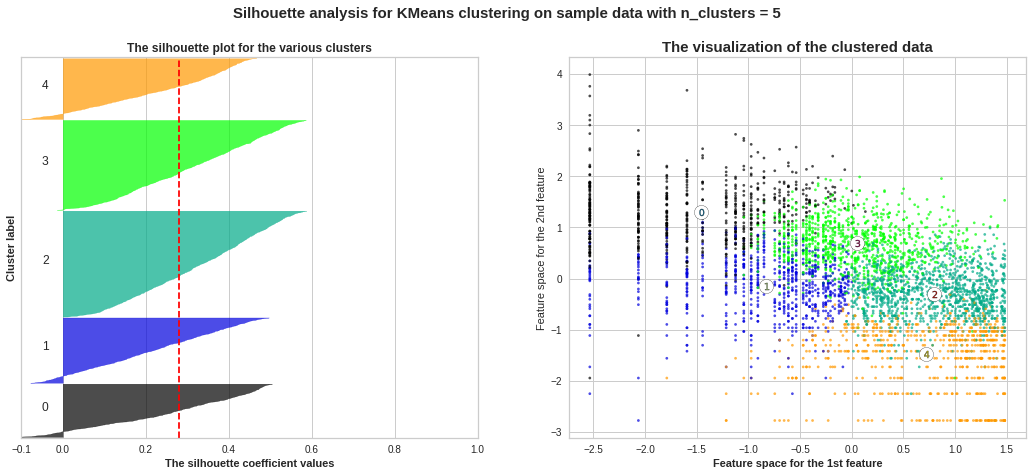

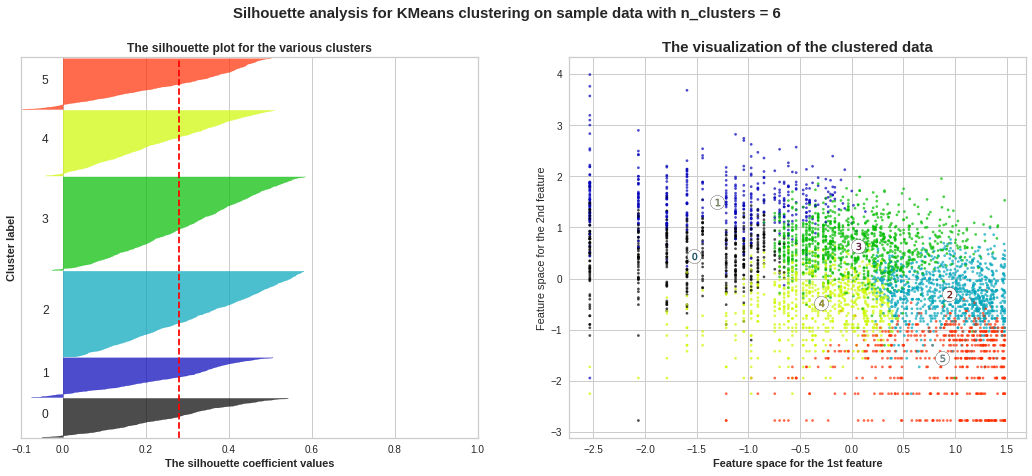

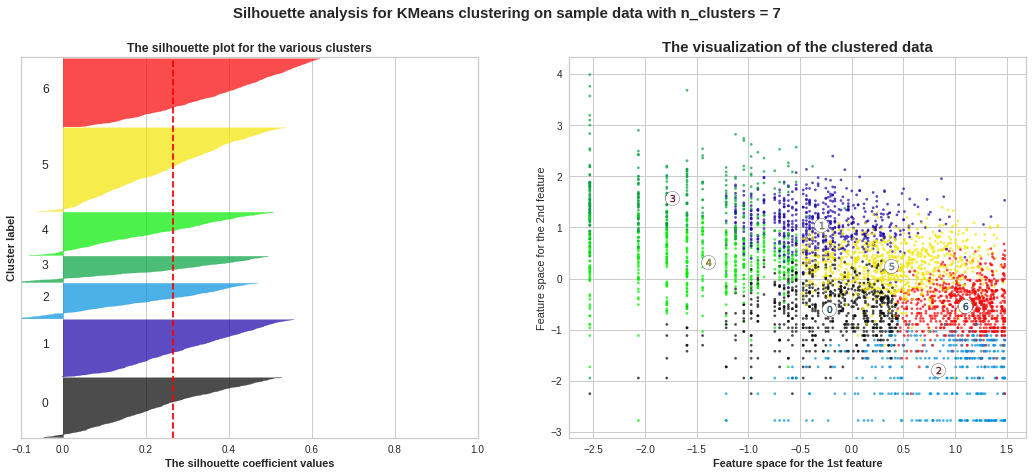

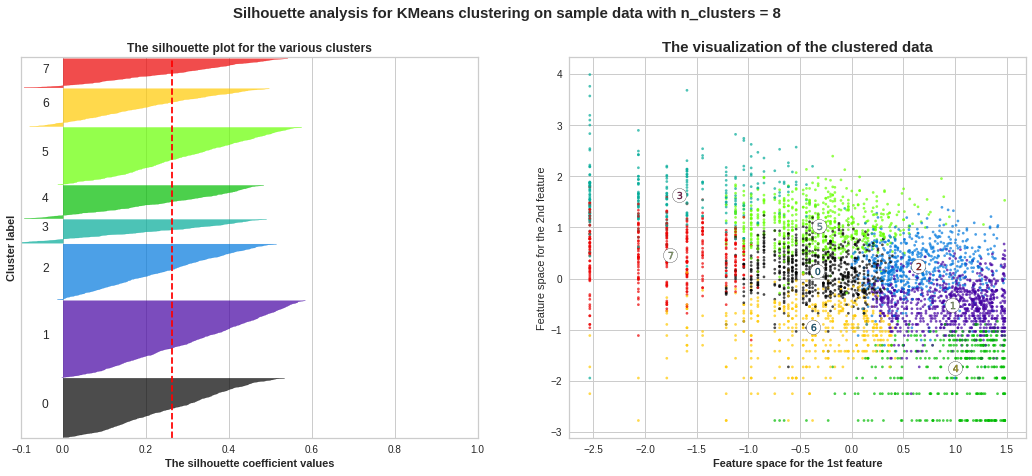

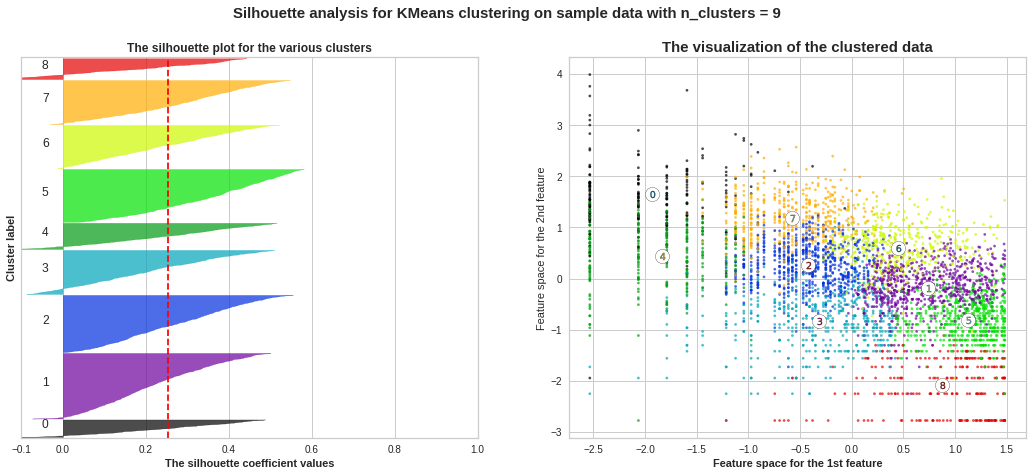

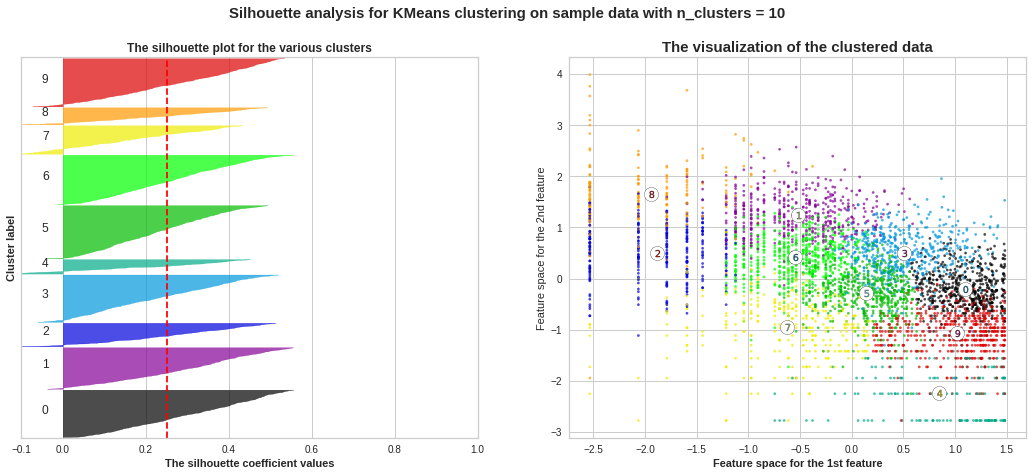

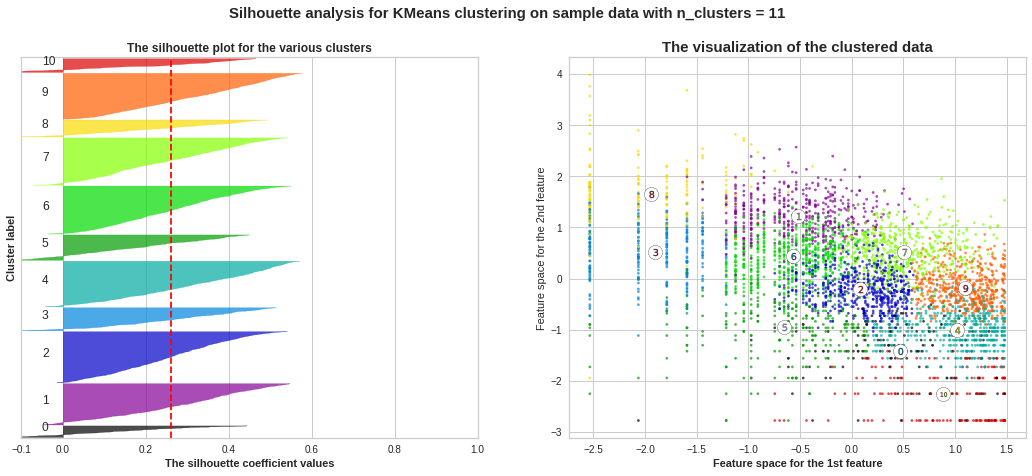

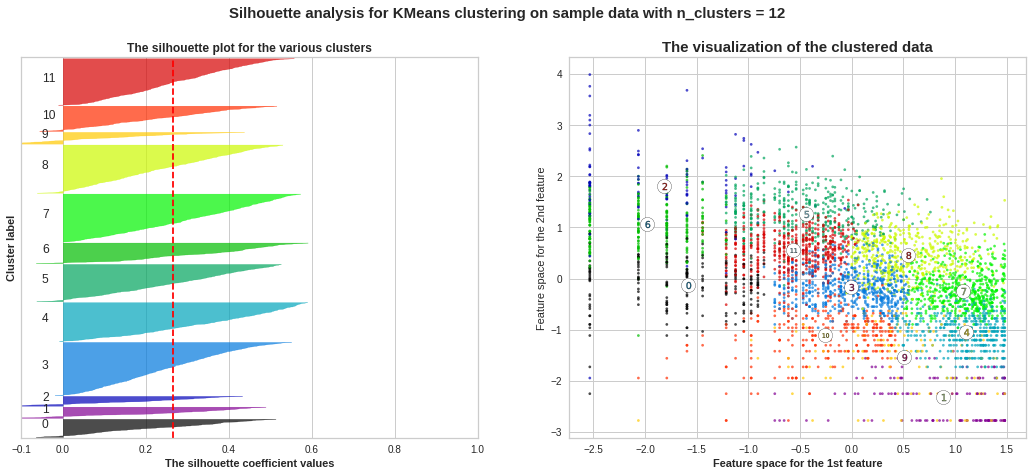

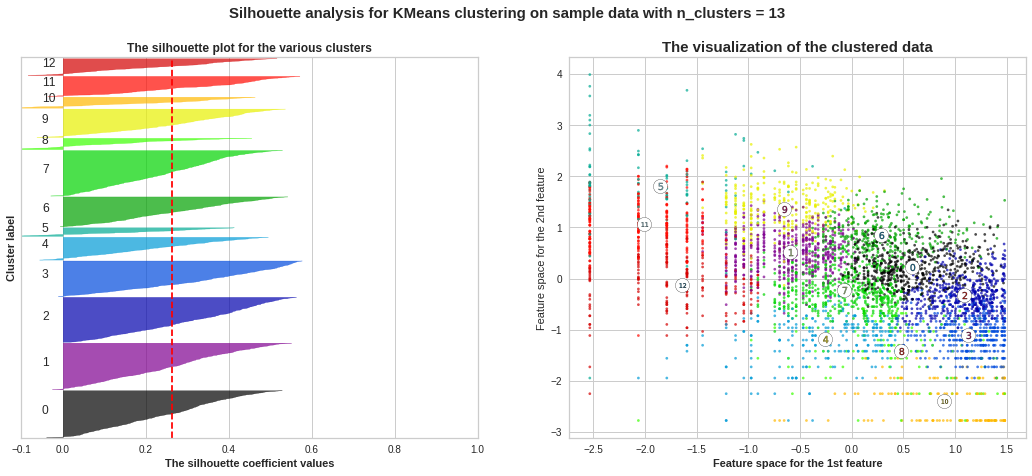

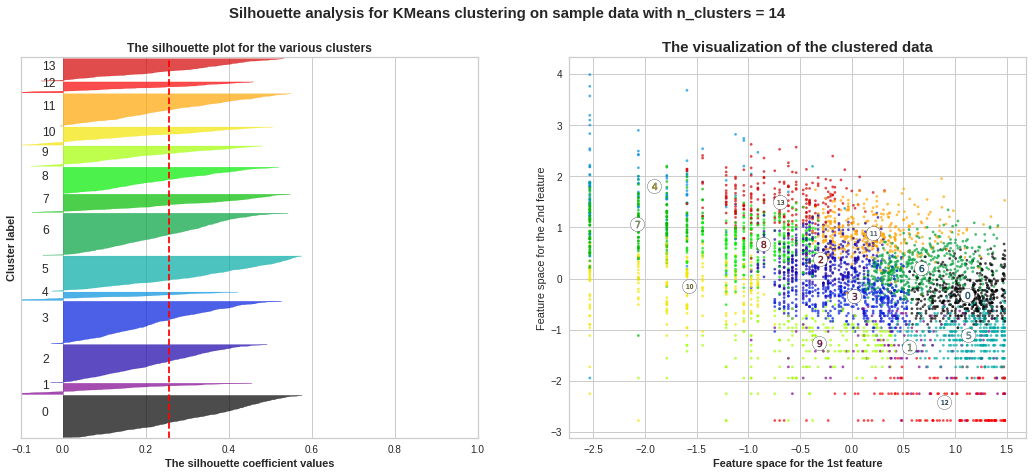

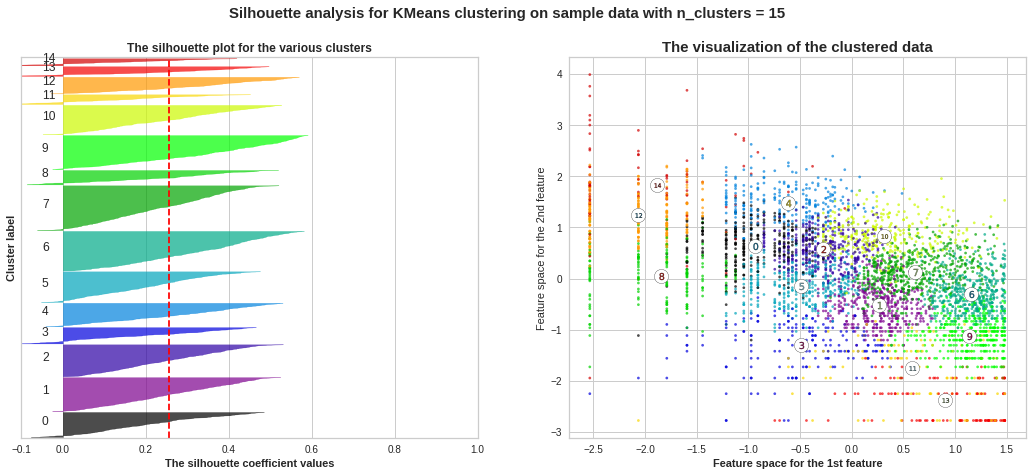

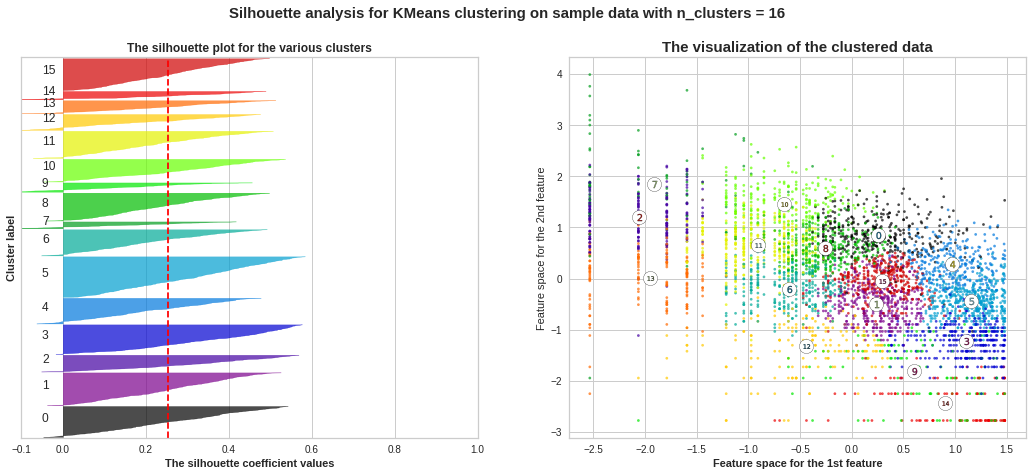

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters", fontweight='bold')
    ax1.set_xlabel("The silhouette coefficient values", fontweight='bold')
    ax1.set_ylabel("Cluster label", fontweight='bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data", fontweight='bold', size=15)
    ax2.set_xlabel("Feature space for the 1st feature", fontweight='bold')
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=15, fontweight='bold')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

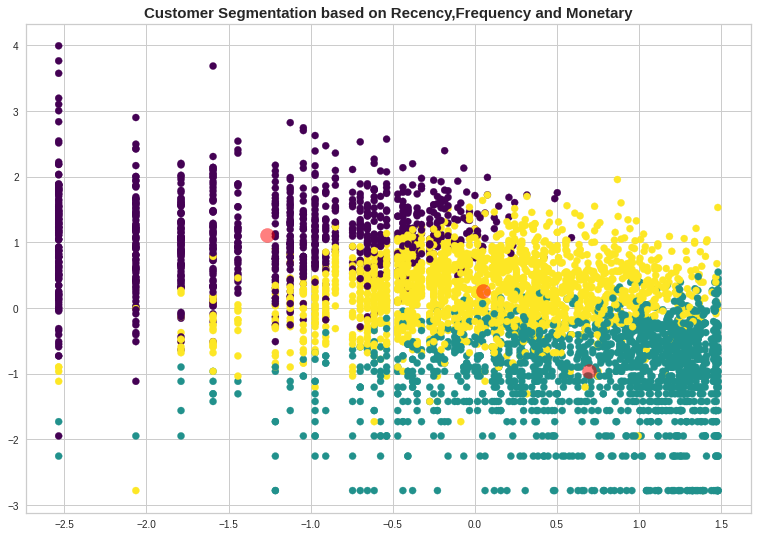

In [ ]:
plt.figure(figsize=(13,9))
plt.title('Customer Segmentation based on Recency,Frequency and Monetary', fontweight='bold', size=15)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **Applying Elbow Method**

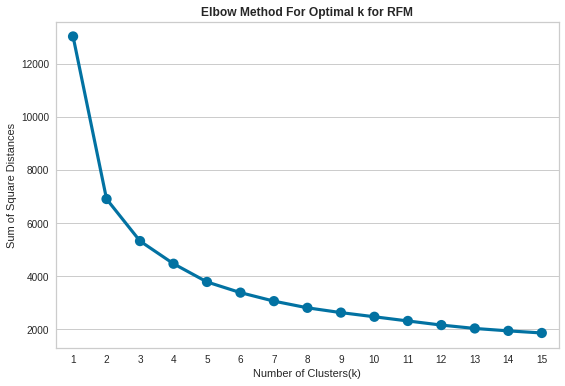

In [ ]:
sum_of_sq_dist = {}
for k in range(1,16):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
  
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize = (9,6))
plt.grid(True)
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k for RFM',fontweight='bold')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        0  
12347.0        0.693147       5.204007      8.368693        2  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

## **Model 3: Hierarical Clustering**

### **Dendogram for Getting Optimal Number of Clusters**

In [ ]:
# Importing library
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

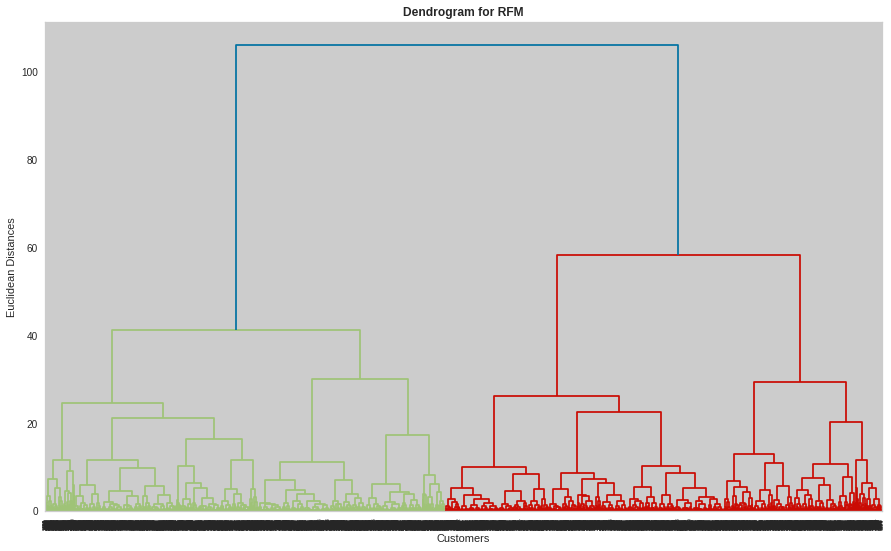

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(15,9))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram for RFM', fontweight= 'bold')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

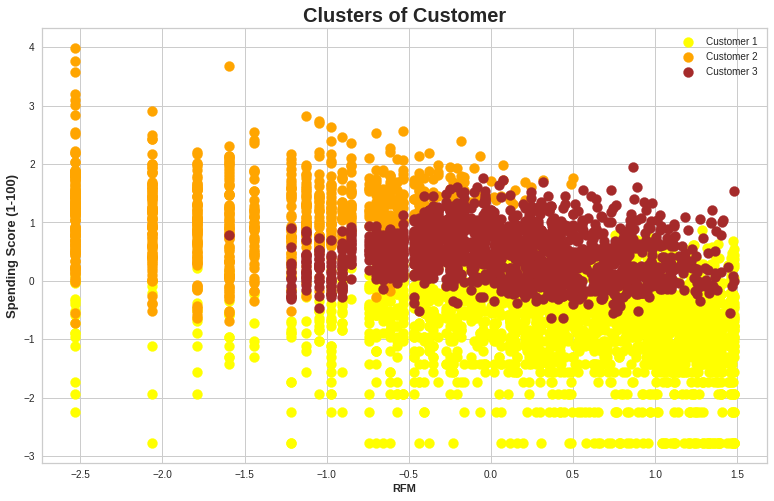

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'orange', label = 'Customer 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'brown', label = 'Customer 3')

plt.title('Clusters of Customer', size = 20, fontweight = 'bold')
plt.xlabel('RFM', fontweight = 'bold')
plt.ylabel('Spending Score (1-100)', size = 13, fontweight = 'bold')
plt.legend()
plt.show()

## **Model 2: DBSCAN**

Text(0.5, 1.0, 'DBSCAN on RFM')

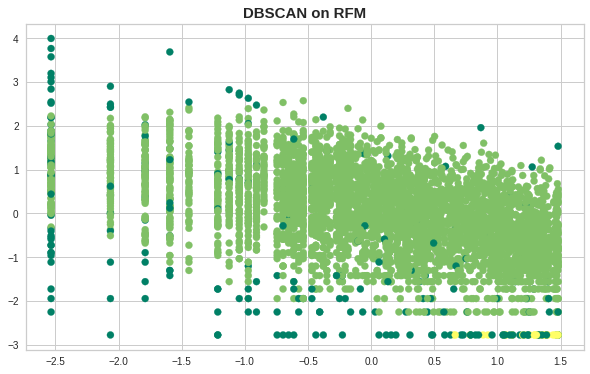

In [ ]:
y_pred = DBSCAN(eps=0.5, min_samples=16).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='summer')
plt.title('DBSCAN on RFM', fontweight='bold', size=15)

# **Summary**

In [ ]:
from prettytable import PrettyTable 

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_Cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with Silhouette_score", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow method", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 

myTable.add_row(['4',"K-Means with Silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow method", "FM", "2"])
myTable.add_row(['6',"DBSCAN", "FM", "3"])

myTable.add_row(['7',"K-Means with Silhouette_score", "RFM", "3"]) 
myTable.add_row(['8',"K-Means with Elbow method", "RFM", "3"])
myTable.add_row(['9',"Hierarchical clustering", "RFM", "3"])
myTable.add_row(['10',"DBSCAN", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_Cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with Silhouette_score  |  RM  |             2             |
|   2    |   K-Means with Elbow method    |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with Silhouette_score  |  FM  |             2             |
|   5    |   K-Means with Elbow method    |  FM  |             2             |
|   6    |             DBSCAN             |  FM  |             3             |
|   7    | K-Means with Silhouette_score  | RFM  |             3             |
|   8    |   K-Means with Elbow method    | RFM  |             3             |
|   9    |    Hierarchical clustering     | RFM  |             3             |
|   10   |             DBSCAN             | RFM  |  

# **Conclusion**

## **A. EDA** 

* Our data possessed with null values in Customer_Id means there are no information available about their customer IDs. So, keeping them in the dataset would make no sense while applying clusterring. Along with some duplicates values were also removed. 
* In Exploratory data analysis we find out different insights like:- 
    * Top **Customer IDs**: **17841.0, 14911.0, 14096.0, 12748.0, 14606.0** </br>
    * Top **Five Countries**: **Uniter Kingdom(88.95%)**, Germany(2.33%), France(1.84%), Ireland(1.84%) and Spain(0.62%). </br>
    * Top **Five products** purchasing on the basis of frequency(How frequent customers are willing to bought these products): </br>
    WHITE HANGING HEART T-LIGHT HOLDER, </br>
    REGENCY CAKESTAND 3 TIER, </br>
    JUMBO BAG RED RETROSPOT, </br>
    PARTY BUNTING and </br>
    ASSORTED COLOUR BIRD ORNAMENT. </br>
    * Top **stock code** on the basis of count values: **85123A, 22423, 85099B, 47566 and 84879**. </br> 

* We did some **feature engineering** like creating new columns with **InvoiceDate** for e.g.,**Year, Month, Day, Hour, Month_Num and Day_Num**. **Total Amount** also calculated using features product between unit price and quantity. </br>
* Which **Year** produced **maximum business**: **2011** </br>
* **Month** which give **maximum business**: **November, October, December, September and May**. </br>
* **Maximum purchasing** on different **days**: **Thursday > Wednesday > Tuesday > Monday > Saturday > Friday**. </b> 
* Most of the customers usually purchase products in between **10:00 A.M to 2:00 P.M**. </br>
* Top **time duration of a day** for purchasing: **Afternoon > Morning > Evening**.</br> 
* On point of **overall business** context: **97.79%** did **good business** making customers happy while **2.21%** did **bad business** as customers cancelled their orders.


## **B. Algorithm**

RFM(Recency, Frequency and Monetary) dataframe ease our problem to solve in a particular order, it makes easy to recommend and display new launched products to few customers. </br>

We applied different clustering algorithms on our given dataset:</br>

1) **Clustering Recency & Monetary (RM)** - {No. of Clusters - 2}</br>
   * K-Means with Silhouette_score </br>
   * K-Means with Elbow Method </br>
   * DBSCAN </br>

2) **Clustering Frequency & Monetary (FM)** - {No. of Clusters - 2} </br>
   * K-Means with Silhouette_score </br>
   * K-Means with Elbow Method </br>
   * DBSCAN {No. of Clusters - 3} </br>

3) **Clustering Recency, Frequency & Monetary (RFM)** - {No. of Clusters - 3} </br>
   * K-Means with Silhouette_score </br>
   * K-Means with Elbow Method </br>
   * DBSCAN </br>
   * Hierarchical Clustering </br>